<a href="https://colab.research.google.com/github/sboonpan/Project_DeepLearning_Gold1H2003-2021/blob/main/Gold1H2003_2021_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import glob
import pandas as pd
from  google.colab import drive 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15.0, 10.0)

import warnings
warnings.simplefilter("ignore")

In [7]:
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [8]:
file_path = glob.glob("/gdrive/My Drive/Data/Forex/XAUUSD1h2001-2021.csv") 
for file in file_path:
  df = pd.read_csv(file)
print(df)

            Date Timestamp      Open      High       Low     Close    Volume
0       20030505  03:00:00   340.345   340.843   339.810   340.036  0.080440
1       20030505  04:00:00   340.461   341.255   339.955   339.987  0.067130
2       20030505  05:00:00   340.134   340.472   339.813   339.989  0.048170
3       20030505  06:00:00   340.347   340.549   339.842   340.009  0.088770
4       20030505  07:00:00   340.221   340.604   339.734   340.231  0.103181
...          ...       ...       ...       ...       ...       ...       ...
113691  20211231  19:00:00  1825.184  1827.318  1824.878  1826.444  2.480120
113692  20211231  20:00:00  1826.454  1828.498  1824.588  1828.244  1.832590
113693  20211231  21:00:00  1828.368  1828.778  1827.058  1827.208  0.574680
113694  20211231  22:00:00  1827.208  1830.248  1826.978  1829.258  0.583395
113695  20211231  23:00:00  1829.308  1829.804  1828.008  1829.058  0.375560

[113696 rows x 7 columns]


In [9]:
df

,Date,Timestamp,Open,High,Low,Close,Volume
0,20030505,03:00:00,340.345,340.843,339.810,340.036,0.080440
1,20030505,04:00:00,340.461,341.255,339.955,339.987,0.067130
2,20030505,05:00:00,340.134,340.472,339.813,339.989,0.048170
3,20030505,06:00:00,340.347,340.549,339.842,340.009,0.088770
4,20030505,07:00:00,340.221,340.604,339.734,340.231,0.103181
...,...,...,...,...,...,...,...
113691,20211231,19:00:00,1825.184,1827.318,1824.878,1826.444,2.480120
113692,20211231,20:00:00,1826.454,1828.498,1824.588,1828.244,1.832590
113693,20211231,21:00:00,1828.368,1828.778,1827.058,1827.208,0.574680
113694,20211231,22:00:00,1827.208,1830.248,1826.978,1829.258,0.583395


In [10]:
df.loc[:,'DateTime'] = pd.to_datetime(df.Date.astype(str)+' '+df.Timestamp.astype(str))
df.drop(columns = ['Date','Timestamp'], inplace = True)
df.set_index('DateTime', inplace = True)
df

,Open,High,Low,Close,Volume
DateTime,,,,,
2003-05-05 03:00:00,340.345,340.843,339.810,340.036,0.080440
2003-05-05 04:00:00,340.461,341.255,339.955,339.987,0.067130
2003-05-05 05:00:00,340.134,340.472,339.813,339.989,0.048170
2003-05-05 06:00:00,340.347,340.549,339.842,340.009,0.088770
2003-05-05 07:00:00,340.221,340.604,339.734,340.231,0.103181
...,...,...,...,...,...
2021-12-31 19:00:00,1825.184,1827.318,1824.878,1826.444,2.480120
2021-12-31 20:00:00,1826.454,1828.498,1824.588,1828.244,1.832590
2021-12-31 21:00:00,1828.368,1828.778,1827.058,1827.208,0.574680


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113696 entries, 2003-05-05 03:00:00 to 2021-12-31 23:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Open    113696 non-null  float64
 1   High    113696 non-null  float64
 2   Low     113696 non-null  float64
 3   Close   113696 non-null  float64
 4   Volume  113696 non-null  float64
dtypes: float64(5)
memory usage: 5.2 MB


##**Volume Bars**

In [12]:
series = df[['Close', 'Volume']]
series.index = df.index
series.columns = ['price', 'volume']
series

,price,volume
DateTime,,
2003-05-05 03:00:00,340.036,0.080440
2003-05-05 04:00:00,339.987,0.067130
2003-05-05 05:00:00,339.989,0.048170
2003-05-05 06:00:00,340.009,0.088770
2003-05-05 07:00:00,340.231,0.103181
...,...,...
2021-12-31 19:00:00,1826.444,2.480120
2021-12-31 20:00:00,1828.244,1.832590
2021-12-31 21:00:00,1827.208,0.574680


In [13]:
df.describe()

,Open,High,Low,Close,Volume
count,113696.000000,113696.000000,113696.000000,113696.000000,113696.000000
mean,1134.156390,1135.775823,1132.487140,1134.174147,1.565634
std,441.297337,441.765627,440.800647,441.283265,1.591800
min,339.748000,340.472000,339.005000,339.911000,0.000075
25%,762.322750,764.075000,759.969750,762.420750,0.427220
50%,1225.584500,1227.094000,1224.211500,1225.598500,1.063405
75%,1408.385500,1410.738750,1406.072000,1408.371250,2.104420
max,2070.148000,2074.798000,2068.168000,2070.128000,30.748699


In [14]:
df.resample(rule = 'A').mean()

,Open,High,Low,Close,Volume
DateTime,,,,,
2003-12-31,372.723475,373.387144,372.071905,372.755677,0.359461
2004-12-31,409.078926,409.833781,408.268275,409.108294,0.599974
2005-12-31,444.444854,445.216954,443.618015,444.498744,0.858826
2006-12-31,603.604954,605.009248,602.233778,603.671957,1.049211
2007-12-31,696.128375,697.229268,694.987328,696.162272,0.441314
2008-12-31,871.674444,873.812566,869.453021,871.676930,0.312585
2009-12-31,972.911670,974.610540,971.127953,972.974182,0.343081
2010-12-31,1226.134034,1227.828802,1224.351708,1226.206564,1.107956
2011-12-31,1572.249585,1574.880350,1569.504531,1572.285751,1.455047


In [15]:
threshold_volume = df.resample(rule = 'A').Volume.mean().min()
threshold_volume

0.31258517117675794

In [18]:
def get_volume_bars(df, threshold):
    result = {
        df.index.name: [],
        'Open': [], 
        'High': [],
        'Low': [], 
        'Close': [], 
        'Volume': []
    }

    Open = None
    High = -np.inf
    Low  = np.inf
    Close = None
    Volume = 0
    
    for index, row in df.iterrows():

        if Open is None:
            Open = row.price
            
        High = max(High, row.price)
        Low  = min(Low,  row.price)
        Volume += row.volume
        
        if Volume >= threshold:
            Close = row.price

            result[df.index.name].append(index)
            result['Open'].append(Open)
            result['High'].append(High)
            result['Low'].append(Low)
            result['Close'].append(Close)
            result['Volume'].append(Volume)

            Open = None
            High = -np.inf
            Low  = np.inf
            Close = None
            Volume = 0
            
    df_result = pd.DataFrame(result)
    df_result.index = df_result[df.index.name]
    df_result.drop(columns=df.index.name, inplace=True)
    return df_result

In [19]:
volume_bars = get_volume_bars(series, threshold_volume)
volume_bars

,Open,High,Low,Close,Volume
DateTime,,,,,
2003-05-05 07:00:00,340.036,340.231,339.987,340.231,0.387691
2003-05-05 11:00:00,339.911,340.608,339.911,340.608,0.339230
2003-05-05 14:00:00,341.080,341.223,341.028,341.223,0.641864
2003-05-05 15:00:00,340.952,340.952,340.952,340.952,0.716096
2003-05-05 16:00:00,341.052,341.052,341.052,341.052,0.775276
...,...,...,...,...,...
2021-12-31 19:00:00,1826.444,1826.444,1826.444,1826.444,2.480120
2021-12-31 20:00:00,1828.244,1828.244,1828.244,1828.244,1.832590
2021-12-31 21:00:00,1827.208,1827.208,1827.208,1827.208,0.574680


In [20]:
df.pct_change().resample(rule = 'A').std()

,Open,High,Low,Close,Volume
DateTime,,,,,
2003-12-31,0.002043,0.001826,0.001883,0.002065,4.699734
2004-12-31,0.002074,0.001800,0.001858,0.002074,1.200812
2005-12-31,0.001733,0.001459,0.001475,0.001762,0.715025
2006-12-31,0.002933,0.002535,0.002698,0.002941,0.306467
2007-12-31,0.002114,0.001844,0.001916,0.002112,0.286666
2008-12-31,0.004112,0.003700,0.003875,0.004117,0.267575
2009-12-31,0.002726,0.002406,0.002541,0.002719,0.311811
2010-12-31,0.002101,0.001858,0.001938,0.002100,0.511990
2011-12-31,0.002593,0.002246,0.002519,0.002591,37.954203


In [21]:
threshlod_cusum = df.pct_change().resample(rule = 'A').std().Close.min()
threshlod_cusum = 2*threshlod_cusum 
threshlod_cusum

0.002506446670063319

In [22]:
def cusum_filter(series, threshold, ingredient='ret'):
    t_events = []
    if ingredient == 'ret':
        returns = series.pct_change()
    elif ingredient == 'log_ret':
        returns = series.apply(np.log).diff()
    returns = returns.iloc[1:]        # remove first nan
    sum_pos = 0
    sum_neg = 0
    for index, ret in returns.items():
        sum_pos += max(sum_pos + ret, 0)
        sum_neg += max(sum_neg - ret, 0)
        
        if sum_pos > threshold:
            t_events.append(index)
            sum_pos = 0

        if sum_neg > threshold:
            t_events.append(index)
            sum_neg = 0
        
    return pd.DatetimeIndex(t_events)

In [23]:
t_events = cusum_filter(df['Close'], threshlod_cusum, ingredient='log_ret')
t_events

DatetimeIndex(['2003-05-05 09:00:00', '2003-05-05 10:00:00',
               '2003-05-05 12:00:00', '2003-05-05 17:00:00',
               '2003-05-05 18:00:00', '2003-05-05 21:00:00',
               '2003-05-05 21:00:00', '2003-05-06 01:00:00',
               '2003-05-06 02:00:00', '2003-05-06 06:00:00',
               ...
               '2021-12-31 02:00:00', '2021-12-31 03:00:00',
               '2021-12-31 07:00:00', '2021-12-31 08:00:00',
               '2021-12-31 12:00:00', '2021-12-31 12:00:00',
               '2021-12-31 15:00:00', '2021-12-31 17:00:00',
               '2021-12-31 19:00:00', '2021-12-31 22:00:00'],
              dtype='datetime64[ns]', length=55953, freq=None)

In [24]:
sampling = df.loc[t_events]
sampling

,Open,High,Low,Close,Volume
DateTime,,,,,
2003-05-05 09:00:00,340.429,340.538,339.849,340.092,0.086730
2003-05-05 10:00:00,340.423,340.523,339.806,340.305,0.083160
2003-05-05 12:00:00,340.754,341.310,340.443,341.080,0.089664
2003-05-05 17:00:00,341.060,341.497,340.184,340.906,0.859824
2003-05-05 18:00:00,341.459,342.145,340.966,341.241,0.893000
...,...,...,...,...,...
2021-12-31 12:00:00,1817.984,1819.714,1817.824,1819.514,0.567130
2021-12-31 15:00:00,1818.828,1827.404,1818.808,1824.204,2.139520
2021-12-31 17:00:00,1822.314,1824.198,1820.184,1821.938,2.017260


In [25]:
sampling.set_index(t_events, inplace=True)
sampling.dropna(inplace = True)
sampling.head(20)

,Open,High,Low,Close,Volume
2003-05-05 09:00:00,340.429,340.538,339.849,340.092,0.086730
2003-05-05 10:00:00,340.423,340.523,339.806,340.305,0.083160
2003-05-05 12:00:00,340.754,341.310,340.443,341.080,0.089664
2003-05-05 17:00:00,341.060,341.497,340.184,340.906,0.859824
2003-05-05 18:00:00,341.459,342.145,340.966,341.241,0.893000
2003-05-05 21:00:00,341.501,342.200,341.258,341.510,0.060550
2003-05-05 21:00:00,341.501,342.200,341.258,341.510,0.060550
2003-05-06 01:00:00,341.626,341.868,341.216,341.778,0.053140
2003-05-06 02:00:00,341.500,341.868,341.196,341.315,0.085210
2003-05-06 06:00:00,341.124,341.499,340.551,341.192,0.069010


In [26]:
condition_1 = sampling['Close'].shift(1) != sampling['Close']
data = sampling[ condition_1 ]
data.head(20)

,Open,High,Low,Close,Volume
2003-05-05 09:00:00,340.429,340.538,339.849,340.092,0.086730
2003-05-05 10:00:00,340.423,340.523,339.806,340.305,0.083160
2003-05-05 12:00:00,340.754,341.310,340.443,341.080,0.089664
2003-05-05 17:00:00,341.060,341.497,340.184,340.906,0.859824
2003-05-05 18:00:00,341.459,342.145,340.966,341.241,0.893000
2003-05-05 21:00:00,341.501,342.200,341.258,341.510,0.060550
2003-05-06 01:00:00,341.626,341.868,341.216,341.778,0.053140
2003-05-06 02:00:00,341.500,341.868,341.196,341.315,0.085210
2003-05-06 06:00:00,341.124,341.499,340.551,341.192,0.069010
2003-05-06 08:00:00,340.925,341.219,340.329,340.527,0.096110


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53192 entries, 2003-05-05 09:00:00 to 2021-12-31 22:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    53192 non-null  float64
 1   High    53192 non-null  float64
 2   Low     53192 non-null  float64
 3   Close   53192 non-null  float64
 4   Volume  53192 non-null  float64
dtypes: float64(5)
memory usage: 2.4 MB


In [28]:
data.index.name = 'Date'

In [29]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2003-05-05 09:00:00,340.429,340.538,339.849,340.092,0.086730
2003-05-05 10:00:00,340.423,340.523,339.806,340.305,0.083160
2003-05-05 12:00:00,340.754,341.310,340.443,341.080,0.089664
2003-05-05 17:00:00,341.060,341.497,340.184,340.906,0.859824
2003-05-05 18:00:00,341.459,342.145,340.966,341.241,0.893000
...,...,...,...,...,...
2021-12-31 12:00:00,1817.984,1819.714,1817.824,1819.514,0.567130
2021-12-31 15:00:00,1818.828,1827.404,1818.808,1824.204,2.139520
2021-12-31 17:00:00,1822.314,1824.198,1820.184,1821.938,2.017260


In [30]:
data.resample(rule = 'A').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2003-12-31,372.664893,373.430996,371.923036,372.705021,0.403761
2004-12-31,408.581499,409.441597,407.665476,408.604517,0.653808
2005-12-31,445.764038,446.631352,444.847728,445.819475,0.894345
2006-12-31,604.870260,606.536930,603.233814,604.946761,1.074086
2007-12-31,698.915206,700.262541,697.568757,698.976411,0.456949
2008-12-31,866.879763,869.525706,864.123263,866.875928,0.321031
2009-12-31,972.537611,974.622797,970.375800,972.623992,0.351238
2010-12-31,1223.185730,1225.263760,1221.009830,1223.271964,1.159200
2011-12-31,1584.170895,1587.453685,1580.672589,1584.116527,1.681551


In [31]:
data.pct_change().resample(rule = 'A').std()

,Open,High,Low,Close,Volume
Date,,,,,
2003-12-31,0.002852,0.002593,0.002673,0.002988,6.482465
2004-12-31,0.002921,0.002582,0.002648,0.002958,3.354682
2005-12-31,0.002436,0.002171,0.002156,0.002513,1.144913
2006-12-31,0.004023,0.003379,0.003657,0.004035,0.392574
2007-12-31,0.003066,0.002656,0.002808,0.003083,0.386258
2008-12-31,0.005415,0.004742,0.004964,0.005443,0.283891
2009-12-31,0.003765,0.003298,0.003396,0.003801,0.379307
2010-12-31,0.002994,0.002626,0.002769,0.003062,0.892452
2011-12-31,0.003606,0.003084,0.003409,0.003644,39.870282


In [32]:
data['Returns'] = np.log(data['Close']/data['Close'].shift(1))
data = data.dropna()
data

,Open,High,Low,Close,Volume,Returns
Date,,,,,,
2003-05-05 10:00:00,340.423,340.523,339.806,340.305,0.083160,0.000626
2003-05-05 12:00:00,340.754,341.310,340.443,341.080,0.089664,0.002275
2003-05-05 17:00:00,341.060,341.497,340.184,340.906,0.859824,-0.000510
2003-05-05 18:00:00,341.459,342.145,340.966,341.241,0.893000,0.000982
2003-05-05 21:00:00,341.501,342.200,341.258,341.510,0.060550,0.000788
...,...,...,...,...,...,...
2021-12-31 12:00:00,1817.984,1819.714,1817.824,1819.514,0.567130,0.000806
2021-12-31 15:00:00,1818.828,1827.404,1818.808,1824.204,2.139520,0.002574
2021-12-31 17:00:00,1822.314,1824.198,1820.184,1821.938,2.017260,-0.001243


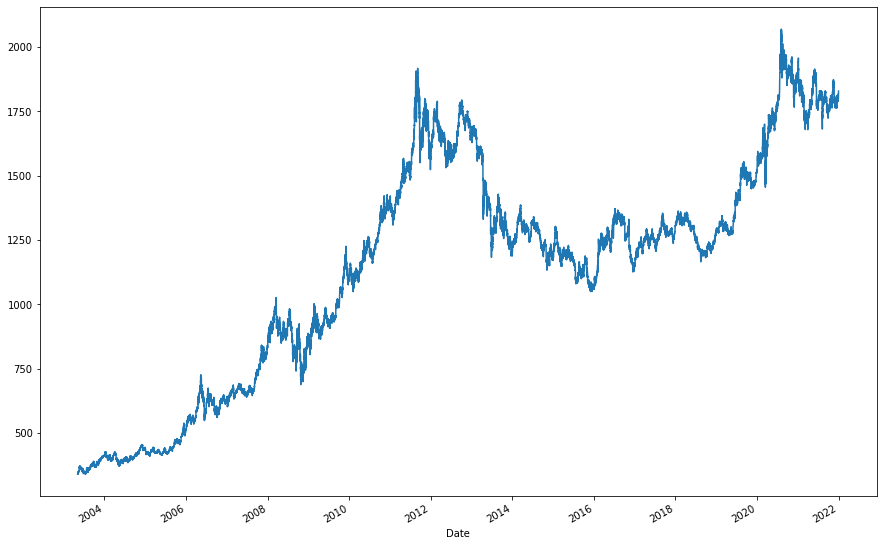

In [33]:
data['Close'].plot()

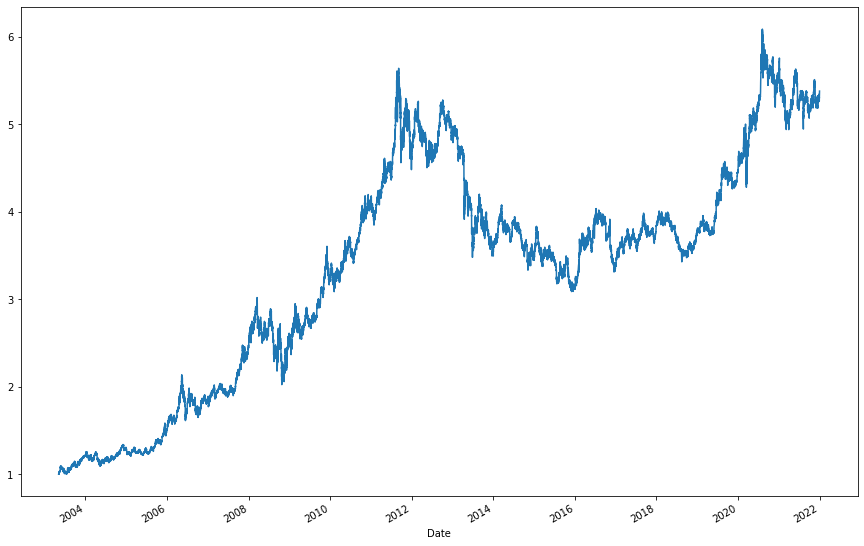

In [34]:
data['Returns'].cumsum().apply(np.exp).plot()

In [35]:
data_close = data['Close']
data_close

Date
2003-05-05 10:00:00     340.305
2003-05-05 12:00:00     341.080
2003-05-05 17:00:00     340.906
2003-05-05 18:00:00     341.241
2003-05-05 21:00:00     341.510
                         ...   
2021-12-31 12:00:00    1819.514
2021-12-31 15:00:00    1824.204
2021-12-31 17:00:00    1821.938
2021-12-31 19:00:00    1826.444
2021-12-31 22:00:00    1829.258
Name: Close, Length: 53191, dtype: float64

In [36]:
data_ret = data['Returns']
data_ret

Date
2003-05-05 10:00:00    0.000626
2003-05-05 12:00:00    0.002275
2003-05-05 17:00:00   -0.000510
2003-05-05 18:00:00    0.000982
2003-05-05 21:00:00    0.000788
                         ...   
2021-12-31 12:00:00    0.000806
2021-12-31 15:00:00    0.002574
2021-12-31 17:00:00   -0.001243
2021-12-31 19:00:00    0.002470
2021-12-31 22:00:00    0.001540
Name: Returns, Length: 53191, dtype: float64

In [37]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

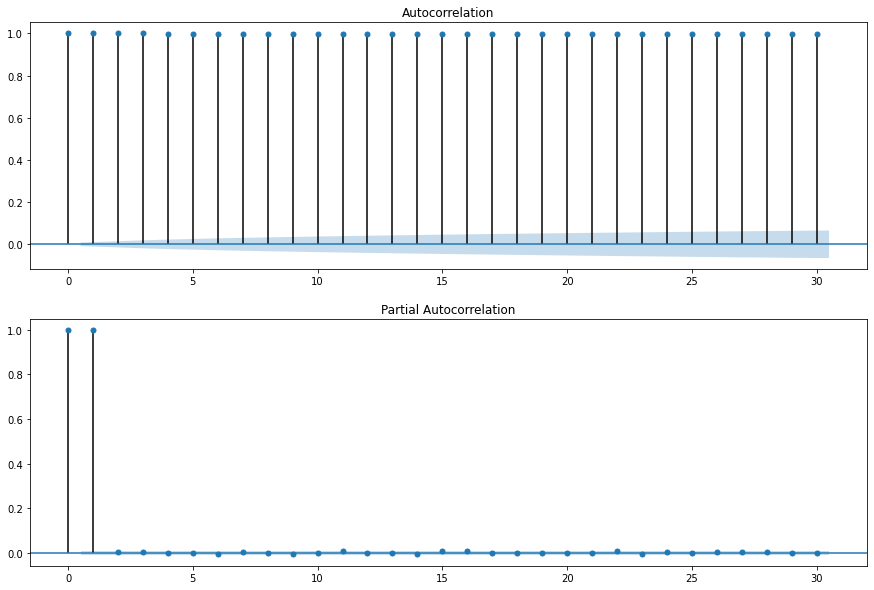

In [38]:
n_lag = 30
sig_lv = 0.05
fig, ax = plt.subplots(2, 1)
plot_acf(data_close, ax=ax[0], lags=n_lag, alpha=sig_lv)
plot_pacf(data_close, ax=ax[1],  lags=n_lag, alpha=sig_lv);

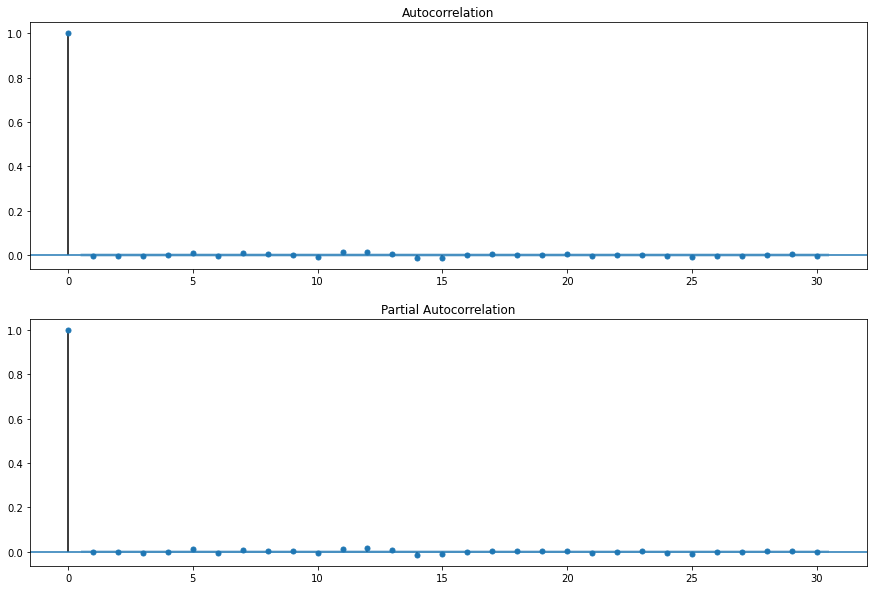

In [40]:
n_lag = 30
sig_lv = 0.05
fig, ax = plt.subplots(2, 1)
plot_acf(data_ret, ax=ax[0], lags=n_lag, alpha=sig_lv)
plot_pacf(data_ret, ax=ax[1],  lags=n_lag, alpha=sig_lv);

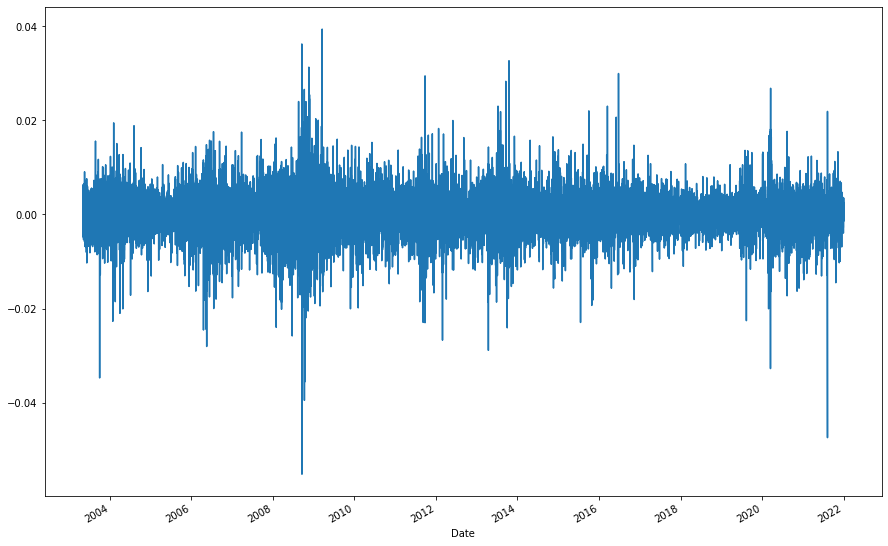

In [41]:
data['Returns'].plot()

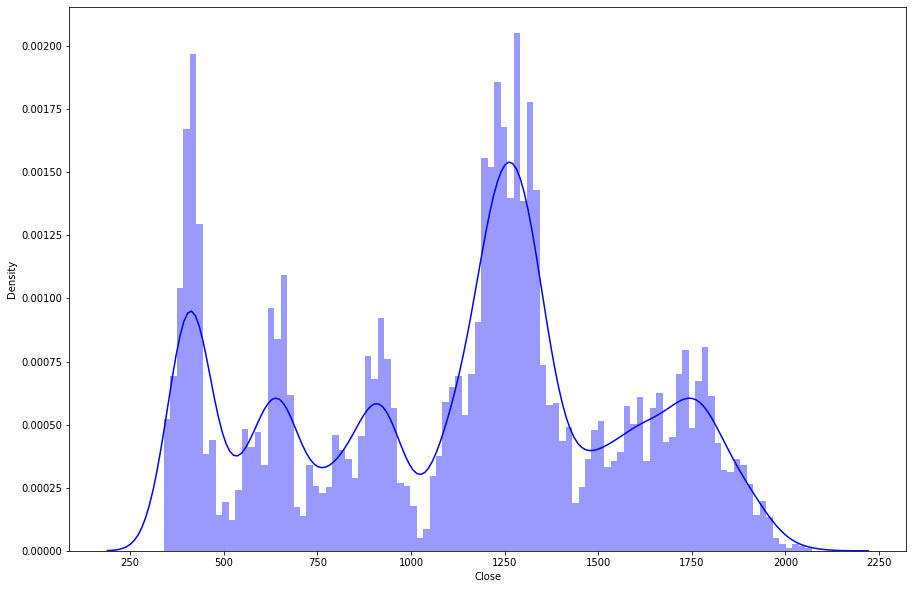

In [42]:
sns.distplot(data['Close'], color = 'blue', bins = 100)

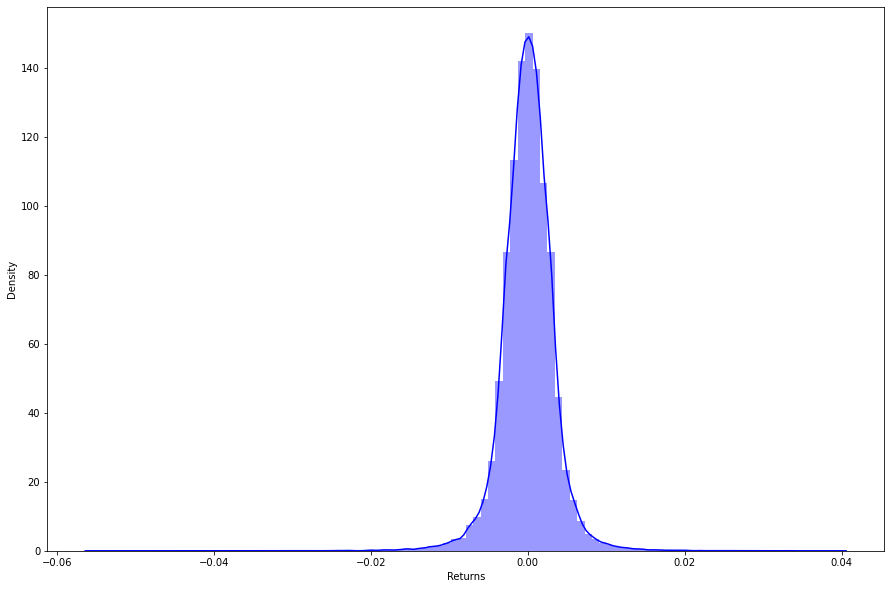

In [43]:
sns.distplot(data['Returns'], color = 'blue', bins = 100)

In [44]:
data_outliers = data['Returns'].rolling(20).agg(["mean", "std"])
data_outliers = data.join(data_outliers)
data_outliers

,Open,High,Low,Close,Volume,Returns,mean,std
Date,,,,,,,,
2003-05-05 10:00:00,340.423,340.523,339.806,340.305,0.083160,0.000626,NaN,NaN
2003-05-05 12:00:00,340.754,341.310,340.443,341.080,0.089664,0.002275,NaN,NaN
2003-05-05 17:00:00,341.060,341.497,340.184,340.906,0.859824,-0.000510,NaN,NaN
2003-05-05 18:00:00,341.459,342.145,340.966,341.241,0.893000,0.000982,NaN,NaN
2003-05-05 21:00:00,341.501,342.200,341.258,341.510,0.060550,0.000788,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-31 12:00:00,1817.984,1819.714,1817.824,1819.514,0.567130,0.000806,0.000466,0.002182
2021-12-31 15:00:00,1818.828,1827.404,1818.808,1824.204,2.139520,0.002574,0.000790,0.001971
2021-12-31 17:00:00,1822.314,1824.198,1820.184,1821.938,2.017260,-0.001243,0.000692,0.002023


In [45]:
def outlier_detection(data, n_sigmas = 3):
    
    x = data["Returns"]
    mu = data["mean"]
    sigma = data["std"]
    
    if (x > mu + sigma*n_sigmas) | (x < mu - n_sigmas * sigma):
        return 1
    else:
        return 0

In [46]:
data_outliers.apply(outlier_detection, axis=1)

Date
2003-05-05 10:00:00    0
2003-05-05 12:00:00    0
2003-05-05 17:00:00    0
2003-05-05 18:00:00    0
2003-05-05 21:00:00    0
                      ..
2021-12-31 12:00:00    0
2021-12-31 15:00:00    0
2021-12-31 17:00:00    0
2021-12-31 19:00:00    0
2021-12-31 22:00:00    0
Length: 53191, dtype: int64

In [47]:
data_outliers['outlier'] = data_outliers.apply(outlier_detection, axis=1)

In [48]:
con = data_outliers['outlier'] == 1
data_outliers[con]

,Open,High,Low,Close,Volume,Returns,mean,std,outlier
Date,,,,,,,,,
2003-08-27 15:00:00,364.850,370.398,363.927,369.948,0.815285,0.015613,0.001314,0.004102,1
2003-10-03 19:00:00,381.117,381.140,367.176,367.836,0.604105,-0.034763,-0.002286,0.007972,1
2003-10-09 15:00:00,374.463,374.465,369.191,369.432,0.725958,-0.012789,-0.000724,0.003942,1
2003-12-01 17:00:00,399.694,400.600,396.961,397.331,1.135190,-0.007170,0.000231,0.002464,1
2004-01-05 02:00:00,415.376,417.592,414.234,416.562,0.467940,0.005097,0.000196,0.001364,1
...,...,...,...,...,...,...,...,...,...
2021-10-22 18:00:00,1811.854,1813.748,1782.788,1785.744,8.000810,-0.014515,0.000064,0.004285,1
2021-10-29 15:00:00,1792.978,1793.384,1775.918,1780.254,4.696325,-0.007122,-0.000412,0.002232,1
2021-11-10 15:00:00,1826.363,1851.668,1822.168,1849.598,4.682170,0.013346,0.000921,0.003276,1


In [49]:
data_outliers[con].shape

(327, 9)

In [50]:
outliers = data_outliers.loc[data_outliers['outlier'] == 1,  ['Returns']]
outliers

,Returns
Date,
2003-08-27 15:00:00,0.015613
2003-10-03 19:00:00,-0.034763
2003-10-09 15:00:00,-0.012789
2003-12-01 17:00:00,-0.007170
2004-01-05 02:00:00,0.005097
...,...
2021-10-22 18:00:00,-0.014515
2021-10-29 15:00:00,-0.007122
2021-11-10 15:00:00,0.013346


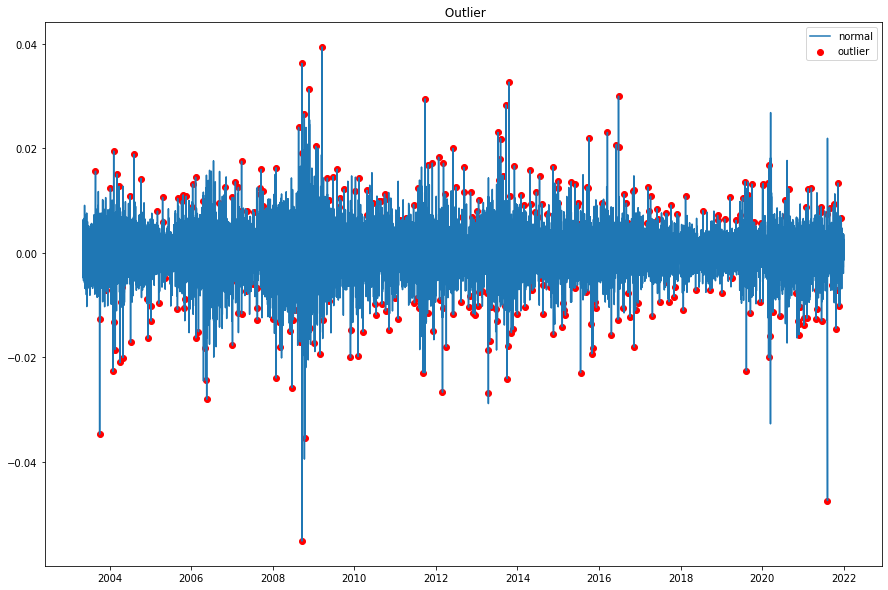

In [51]:
#import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = (12.0, 8.0)

fig, ax = plt.subplots()

ax.plot(data_outliers.index, data_outliers["Returns"], label='normal')
ax.scatter(outliers.index, outliers["Returns"], color="red", label="outlier")
ax.set_title(f" Outlier")
ax.legend()
plt.show()

In [52]:
condition_2 = data_outliers['outlier'] != 1
data = data_outliers[condition_2]
data

,Open,High,Low,Close,Volume,Returns,mean,std,outlier
Date,,,,,,,,,
2003-05-05 10:00:00,340.423,340.523,339.806,340.305,0.083160,0.000626,NaN,NaN,0
2003-05-05 12:00:00,340.754,341.310,340.443,341.080,0.089664,0.002275,NaN,NaN,0
2003-05-05 17:00:00,341.060,341.497,340.184,340.906,0.859824,-0.000510,NaN,NaN,0
2003-05-05 18:00:00,341.459,342.145,340.966,341.241,0.893000,0.000982,NaN,NaN,0
2003-05-05 21:00:00,341.501,342.200,341.258,341.510,0.060550,0.000788,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
2021-12-31 12:00:00,1817.984,1819.714,1817.824,1819.514,0.567130,0.000806,0.000466,0.002182,0
2021-12-31 15:00:00,1818.828,1827.404,1818.808,1824.204,2.139520,0.002574,0.000790,0.001971,0
2021-12-31 17:00:00,1822.314,1824.198,1820.184,1821.938,2.017260,-0.001243,0.000692,0.002023,0


In [53]:
data = data.dropna()
data

,Open,High,Low,Close,Volume,Returns,mean,std,outlier
Date,,,,,,,,,
2003-05-07 11:00:00,342.526,342.934,342.182,342.570,0.116720,-0.002475,0.000363,0.002444,0
2003-05-07 12:00:00,342.113,342.613,341.345,341.614,0.094480,-0.002795,0.000192,0.002542,0
2003-05-07 13:00:00,342.043,342.732,341.765,342.186,0.009230,0.001673,0.000162,0.002520,0
2003-05-07 15:00:00,342.553,343.194,342.282,342.725,0.822340,0.001574,0.000266,0.002533,0
2003-05-07 17:00:00,342.827,343.274,340.991,342.223,0.858633,-0.001466,0.000144,0.002556,0
...,...,...,...,...,...,...,...,...,...
2021-12-31 12:00:00,1817.984,1819.714,1817.824,1819.514,0.567130,0.000806,0.000466,0.002182,0
2021-12-31 15:00:00,1818.828,1827.404,1818.808,1824.204,2.139520,0.002574,0.000790,0.001971,0
2021-12-31 17:00:00,1822.314,1824.198,1820.184,1821.938,2.017260,-0.001243,0.000692,0.002023,0


In [54]:
data.drop(columns = 'outlier', inplace = True)
data

,Open,High,Low,Close,Volume,Returns,mean,std
Date,,,,,,,,
2003-05-07 11:00:00,342.526,342.934,342.182,342.570,0.116720,-0.002475,0.000363,0.002444
2003-05-07 12:00:00,342.113,342.613,341.345,341.614,0.094480,-0.002795,0.000192,0.002542
2003-05-07 13:00:00,342.043,342.732,341.765,342.186,0.009230,0.001673,0.000162,0.002520
2003-05-07 15:00:00,342.553,343.194,342.282,342.725,0.822340,0.001574,0.000266,0.002533
2003-05-07 17:00:00,342.827,343.274,340.991,342.223,0.858633,-0.001466,0.000144,0.002556
...,...,...,...,...,...,...,...,...
2021-12-31 12:00:00,1817.984,1819.714,1817.824,1819.514,0.567130,0.000806,0.000466,0.002182
2021-12-31 15:00:00,1818.828,1827.404,1818.808,1824.204,2.139520,0.002574,0.000790,0.001971
2021-12-31 17:00:00,1822.314,1824.198,1820.184,1821.938,2.017260,-0.001243,0.000692,0.002023


In [55]:
data.drop(columns = ['mean',	'std'], inplace = True)
data

,Open,High,Low,Close,Volume,Returns
Date,,,,,,
2003-05-07 11:00:00,342.526,342.934,342.182,342.570,0.116720,-0.002475
2003-05-07 12:00:00,342.113,342.613,341.345,341.614,0.094480,-0.002795
2003-05-07 13:00:00,342.043,342.732,341.765,342.186,0.009230,0.001673
2003-05-07 15:00:00,342.553,343.194,342.282,342.725,0.822340,0.001574
2003-05-07 17:00:00,342.827,343.274,340.991,342.223,0.858633,-0.001466
...,...,...,...,...,...,...
2021-12-31 12:00:00,1817.984,1819.714,1817.824,1819.514,0.567130,0.000806
2021-12-31 15:00:00,1818.828,1827.404,1818.808,1824.204,2.139520,0.002574
2021-12-31 17:00:00,1822.314,1824.198,1820.184,1821.938,2.017260,-0.001243


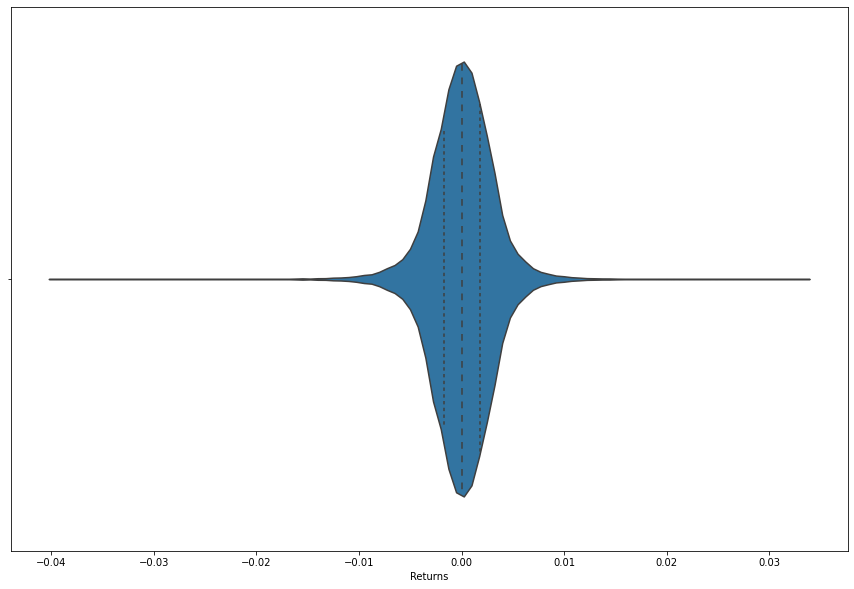

In [56]:
from scipy import stats
sns.violinplot(data['Returns'],inner="quartile")

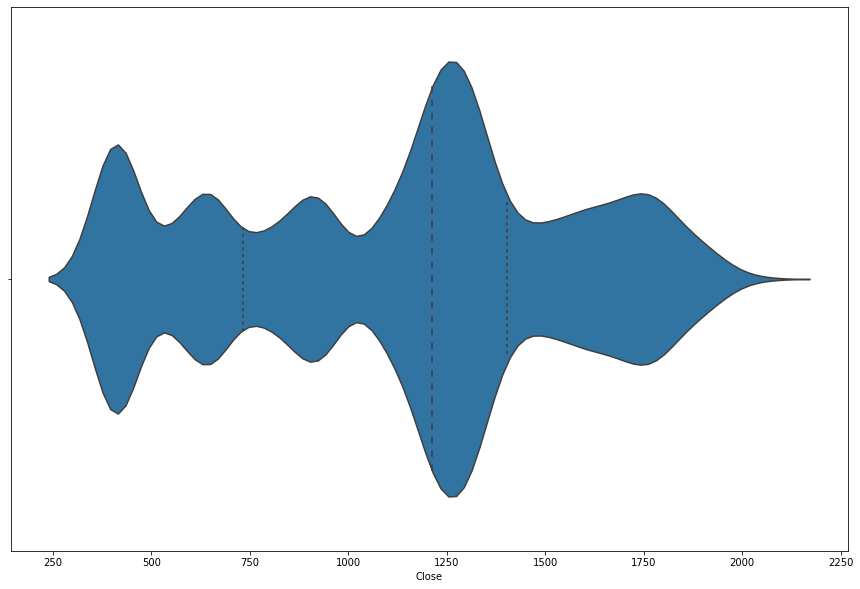

In [59]:
sns.violinplot(data['Close'],inner="quartile")

((array([-4.20392107, -3.99875575, -3.88692376, ...,  3.88692376,
          3.99875575,  4.20392107]),
  array([-0.03953102, -0.03277269, -0.02889716, ...,  0.02684538,
          0.02697413,  0.03323159])),
 (0.0030571623650303384, 3.3142645753490206e-05, 0.9801133928330547))

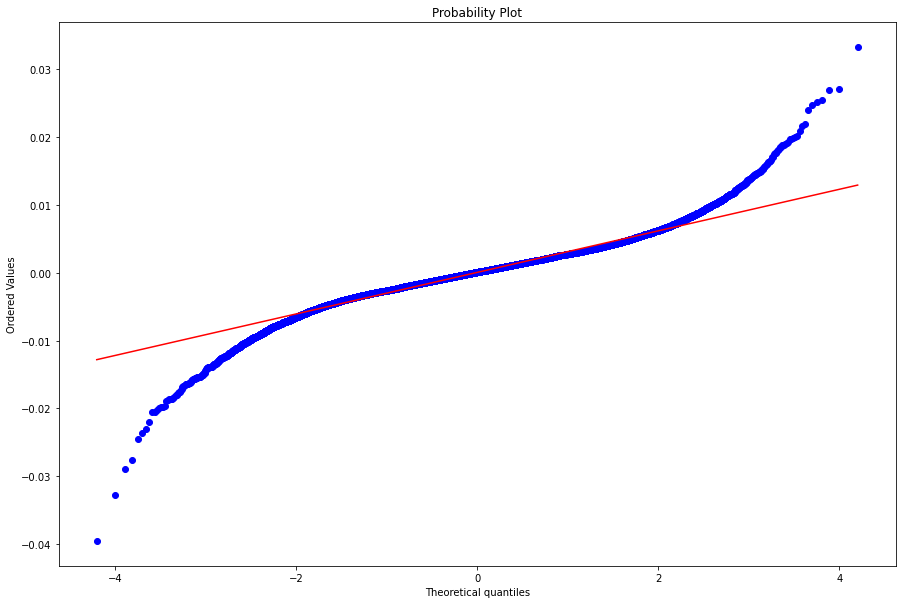

In [57]:
stats.probplot(data['Returns'], dist="norm", plot=plt)

((array([-4.20392107, -3.99875575, -3.88692376, ...,  3.88692376,
          3.99875575,  4.20392107]),
  array([ 340.281,  340.584,  340.59 , ..., 2066.618, 2067.845, 2070.128])),
 (433.54688626794785, 1122.2744987226793, 0.9761811003838441))

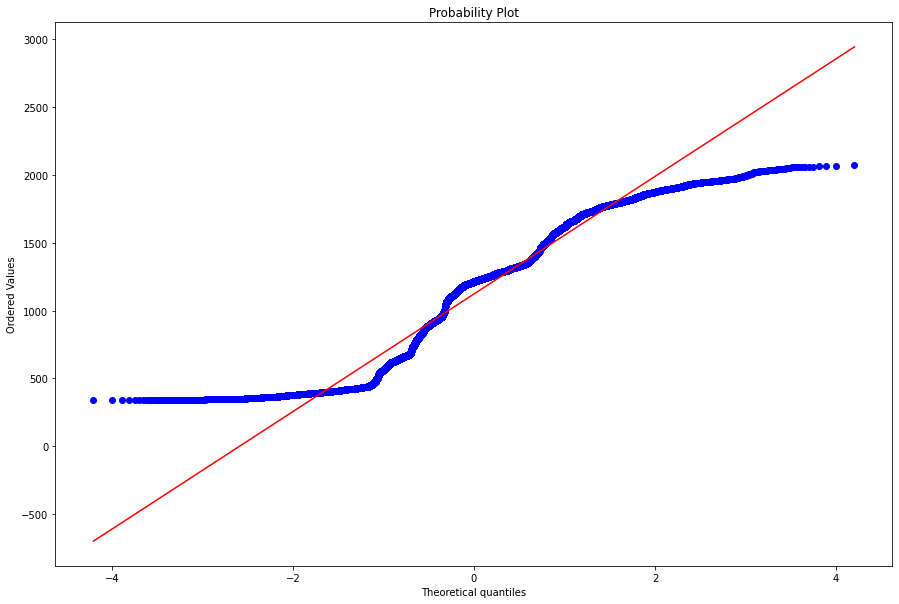

In [58]:
stats.probplot(data['Close'], dist="norm", plot=plt)

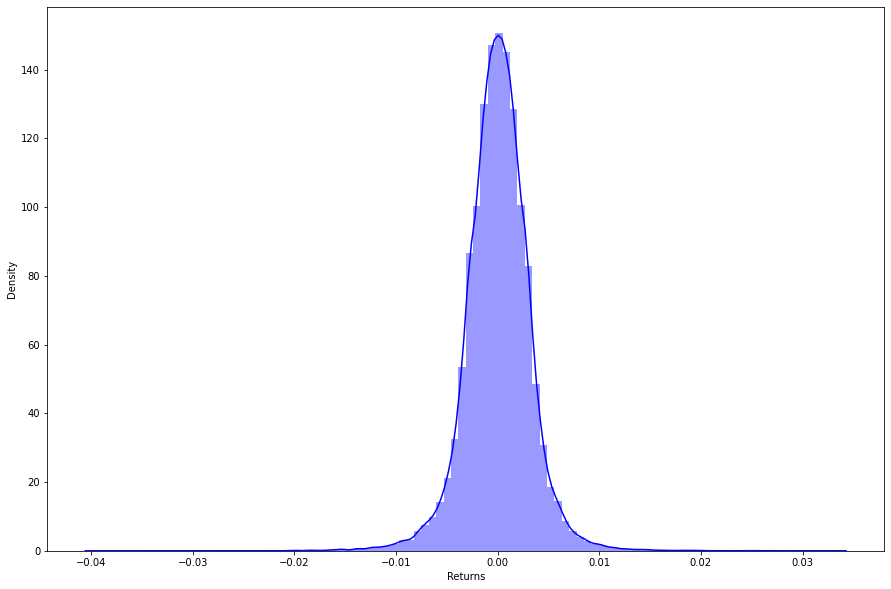

In [60]:
sns.distplot(data['Returns'], color = 'blue', bins = 100)

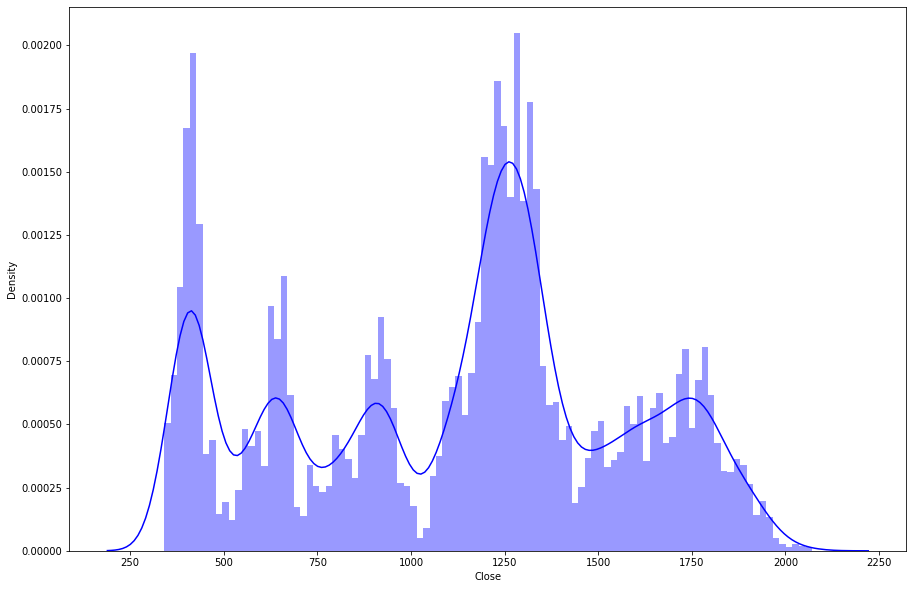

In [61]:
sns.distplot(data['Close'], color = 'blue', bins = 100)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52845 entries, 2003-05-07 11:00:00 to 2021-12-31 22:00:00
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     52845 non-null  float64
 1   High     52845 non-null  float64
 2   Low      52845 non-null  float64
 3   Close    52845 non-null  float64
 4   Volume   52845 non-null  float64
 5   Returns  52845 non-null  float64
dtypes: float64(6)
memory usage: 2.8 MB


In [63]:
data

,Open,High,Low,Close,Volume,Returns
Date,,,,,,
2003-05-07 11:00:00,342.526,342.934,342.182,342.570,0.116720,-0.002475
2003-05-07 12:00:00,342.113,342.613,341.345,341.614,0.094480,-0.002795
2003-05-07 13:00:00,342.043,342.732,341.765,342.186,0.009230,0.001673
2003-05-07 15:00:00,342.553,343.194,342.282,342.725,0.822340,0.001574
2003-05-07 17:00:00,342.827,343.274,340.991,342.223,0.858633,-0.001466
...,...,...,...,...,...,...
2021-12-31 12:00:00,1817.984,1819.714,1817.824,1819.514,0.567130,0.000806
2021-12-31 15:00:00,1818.828,1827.404,1818.808,1824.204,2.139520,0.002574
2021-12-31 17:00:00,1822.314,1824.198,1820.184,1821.938,2.017260,-0.001243


In [69]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [75]:
!cp -r 'Gold1H2003-2021_Sampling.csv' /content/gdrive/MyDrive/Data/Forex/